In [7]:
from IPython import display

# File Processing
import glob
import os
from os.path import isdir, join
from pathlib import Path

# Math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
from scipy import signal
from scipy.io import wavfile

# Data Plotting and Visualizations
from PIL import Image
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

# Sklearn Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Tensorflow
import tensorflow as tf
from tensorflow.python.data import Dataset
import tensorflow_hub as hub

tf.logging.set_verbosity(tf.logging.ERROR)
tf.logging.set_verbosity(tf.logging.INFO)
pd.options.display.max_rows = 40
pd.options.display.float_format = '{:.2f}'.format

In [3]:
train_audio_folder = './train/audio/'
train_spect_tmp_folder = './train/spect_tmp/'
train_spect_folder = './train/spect/'

In [16]:
subfolders = [x for x in os.listdir(train_audio_folder) if os.path.isdir(train_audio_folder + '/' + x)]

In [17]:
def create_label_subfolders(path, subfolders):
    for x in subfolders:
        subfolder_path = path + x
        if os.path.exists(subfolder_path):
            print("%s already exists in this folder" % x)
        else: 
            os.makedirs(subfolder_path)
            print("%s folder created at %s" % (x, subfolder_path))

In [18]:
create_label_subfolders(train_spect_folder, subfolders)

zero already exists in this folder
six already exists in this folder
happy already exists in this folder
on already exists in this folder
left already exists in this folder
one already exists in this folder
no already exists in this folder
go already exists in this folder
_background_noise_ already exists in this folder
off already exists in this folder
tree already exists in this folder
bed already exists in this folder
cat already exists in this folder
up already exists in this folder
eight already exists in this folder
marvin already exists in this folder
stop already exists in this folder
yes already exists in this folder
three already exists in this folder
down already exists in this folder
nine already exists in this folder
four already exists in this folder
seven already exists in this folder
sheila already exists in this folder
dog already exists in this folder
right already exists in this folder
two already exists in this folder
wow already exists in this folder
house already 

In [12]:
def log_specgram2(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [4]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

In [20]:
def create_spectrogram_file(subfolder, filename):
    tmp_img = './train/spect_tmp/' + filename[:-4] + "_" + subfolder + "_tmp.jpg"
    spect_img = './train/spect/' + subfolder + '/' + filename[:-4] + "_spect.jpg"
    
    sample_rate, samples = wavfile.read('./train/audio/' + subfolder + '/' + filename)
    freqs, times, spectrogram = log_specgram(samples, sample_rate)
    mean = np.mean(spectrogram, axis=0)
    std = np.std(spectrogram, axis=0)
    spectrogram = (spectrogram - mean) / std
    
    fig = plt.figure(figsize=(14, 8))
    ax2 = fig.add_subplot(211)
    ax2.imsave(spectrogram.T, aspect='auto', origin='lower', 
               extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    ax2.set_axis_off()
    
    plt.savefig(tmp_img, bbox_inches='tight', transparent=True)
    plt.close(fig)
    fig.clf()
    
    size = 224, 224
    im = Image.open(tmp_img).resize(size)
    os.remove(tmp_img)
    im.save(spect_img)

In [ ]:
%%time
total = 0
for x in subfolders:
    subfolder_wav_files = [x for x in os.listdir(train_audio_folder + x) if '.wav' in x]
    len_subfolder = len(subfolder_wav_files)
    total += len_subfolder
    for y in range(len_subfolder):
        create_spectrogram_file(x, subfolder_wav_files[y])
        if y % 100 == 0:
            print("%d of %d images in %s processed" % (y, len_subfolder, x))
    print('file count in %s: %d' % (x, len_subfolder))
print('total file count: %d' % (total))

0 of 2376 images in zero processed
100 of 2376 images in zero processed
200 of 2376 images in zero processed


In [ ]:
# fig = plt.figure(figsize=(14, 8))
# ax1 = fig.add_subplot(211)
# ax1.set_title('Raw wave of ' + filename)
# ax1.set_ylabel('Amplitude')
# ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [9]:
#ONE IMAGE TEST
one_file = './train/audio/bird/66041c69_nohash_0.wav'
tmp = './train/spect_tmp/66041c69_nohash_0_tmp.jpg'
spect = './train/spect/66041c69_nohash_0_spect.jpg'


sample_rate, samples = wavfile.read(one_file)
_, spectrogram = log_specgram(samples, sample_rate)

plt.imsave(spectrogram.T, aspect='auto', origin='lower')
plt.axis('off')


# freqs, times, spectrogram = log_specgram(samples, sample_rate)
# mean = np.mean(spectrogram, axis=0)
# std = np.std(spectrogram, axis=0)
# spectrogram = (spectrogram - mean) / std


# fig = plt.figure(figsize=(14, 8))
# #ax2 = fig.add_subplot(211)
# plt.imsave(spectrogram)
# plt.imsave(spectrogram.T, aspect='auto', origin='lower', 
#            extent=[times.min(), times.max(), freqs.min(), freqs.max()])

# ax2.set_yticks(freqs[::16])
# ax2.set_xticks(times[::16])
# ax2.set_title('Spectrogram of ' + filename)
# ax2.set_ylabel('Freqs in Hz')
# ax2.set_xlabel('Seconds')
# plt.axis('off')
# ax2.set_axis_off()
#plt.savefig('spect003.png', bbox_inches='tight', transparent=True)
#plt.close(fig)
#fig.clf()

# size = 224, 224
# im = Image.open(tmp_img).resize(size)
# os.remove(tmp_img)
# im.save(spect_img)    

TypeError: imsave() got an unexpected keyword argument 'aspect'

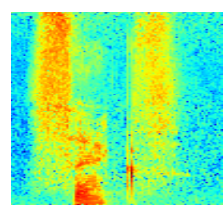

In [95]:
size = 224, 224
im.resize(size)

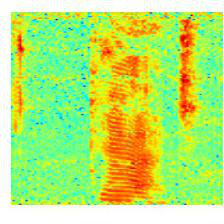

In [22]:
Image.open('./train/spect/cat/4f2be90f_nohash_0_spect.jpg')